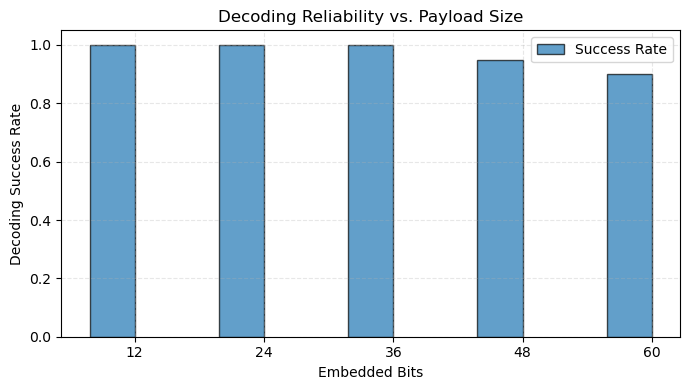

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Data
# -------------------------------------------------------
bits_embedded = np.array([12, 24, 36, 48, 60])

success_rate = np.array([1.0, 1.0, 1, 0.95, 0.90])

# Use equal-spaced categorical x positions
x = np.arange(len(bits_embedded))

bar_width = 0.35  # width of each box

plt.figure(figsize=(7,4))

# Regular success rate
plt.bar(
    x - bar_width/2,
    success_rate,
    width=bar_width,
    color="C0",
    edgecolor="black",
    alpha=0.7,
    label="Success Rate",
)


# Set categorical ticks
plt.xticks(x, bits_embedded)

plt.xlabel("Embedded Bits")
plt.ylabel("Decoding Success Rate")
plt.ylim(0, 1.05)
plt.title("Decoding Reliability vs. Payload Size")
plt.grid(True, alpha=0.3, linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()


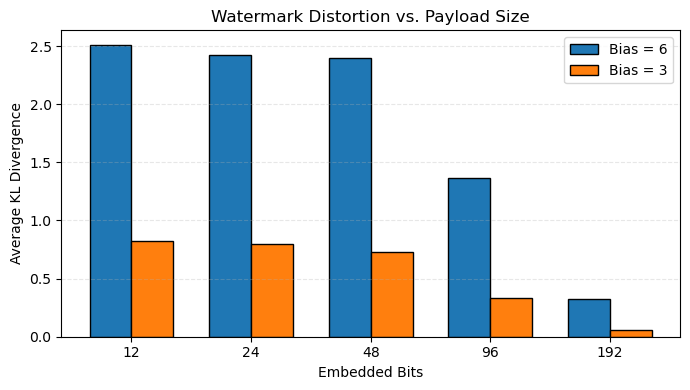

In [6]:
# Quality

bits_embedded = np.array([12, 24, 48, 96, 192])

# Example KL divergence values
avg_kl_bias6 = np.array([2.51, 2.42, 2.40, 1.361, 0.322])
avg_kl_bias3 = np.array([0.82, 0.80, 0.73, 0.33, 0.055])

# -------------------------------------------------------
# Uniform spacing index
# -------------------------------------------------------
x = np.arange(len(bits_embedded))  # [0,1,2,3,4]
bar_width = 0.35

plt.figure(figsize=(7,4))

# Bars for bias=6
plt.bar(
    x - bar_width/2,
    avg_kl_bias6,
    width=bar_width,
    label="Bias = 6",
    color="C0",
    edgecolor="black"
)

# Bars for bias=3
plt.bar(
    x + bar_width/2,
    avg_kl_bias3,
    width=bar_width,
    label="Bias = 3",
    color="C1",
    edgecolor="black"
)

# -------------------------------------------------------
# Formatting
# -------------------------------------------------------
plt.xticks(x, bits_embedded)   # label with actual bit values
plt.xlabel("Embedded Bits")
plt.ylabel("Average KL Divergence")
plt.title("Watermark Distortion vs. Payload Size")
plt.grid(axis="y", alpha=0.3, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

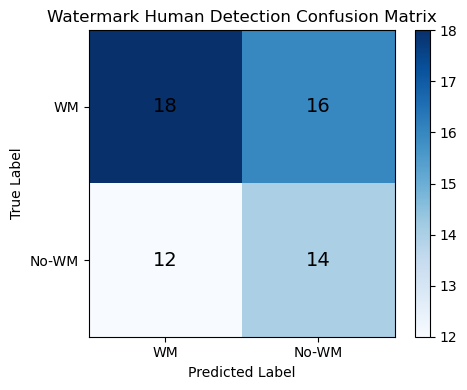

In [13]:
def plot_confusion_matrix(tp, fp, fn, tn, title="Confusion Matrix"):
    """
    Plots a 2×2 confusion matrix for watermark detection:
           Predicted
           WM   |  No-WM
    True  -----------------
    WM     tp   |   fn
    No-WM  fp   |   tn
    """
    cm = np.array([[tp, fn],
                   [fp, tn]])

    fig, ax = plt.subplots(figsize=(5,4))
    im = ax.imshow(cm, cmap="Blues")

    # labels
    classes = ["Watermarked", "Not Watermarked"]
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels(["WM", "No-WM"])
    ax.set_yticklabels(["WM", "No-WM"])

    # add text
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j],
                    ha="center", va="center",
                    color="black", fontsize=14)

    # colorbar
    plt.colorbar(im, ax=ax)

    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(title)

    plt.tight_layout()
    plt.show()


plot_confusion_matrix(18, 12, 16, 14,
                      title="Watermark Human Detection Confusion Matrix")


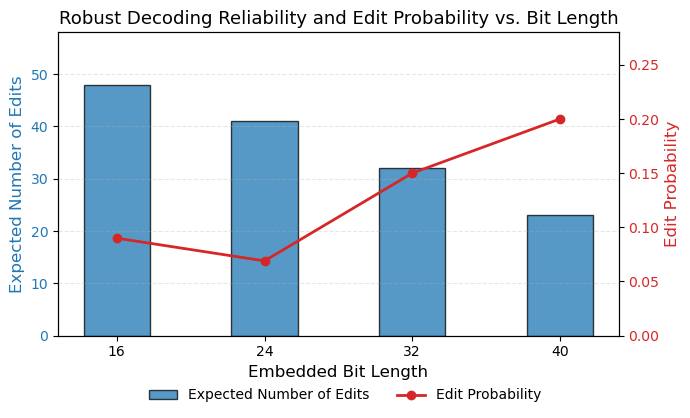

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Data
# -------------------------
bits_embedded = np.array([16, 24, 32, 40])
P = np.array([0.08, 0.069, 0.15, 0.2])          # edit probabilities
success_rate_mywork = np.array([48, 41, 32, 23])  # recovered bits

x = np.arange(len(bits_embedded))
bar_width = 0.45

fig, ax1 = plt.subplots(figsize=(7,4))

# -------------------------
# PRIMARY AXIS (bars)
# -------------------------
bars = ax1.bar(
    x,
    success_rate_mywork,
    width=bar_width,
    color="C0",
    edgecolor="black",
    alpha=0.75,
    label="Expected Number of Edits"
)

ax1.set_xlabel("Embedded Bit Length", fontsize=12)
ax1.set_ylabel("Expected Number of Edits", fontsize=12, color="C0")
ax1.tick_params(axis="y", labelcolor="C0")
ax1.set_ylim(0, max(success_rate_mywork) + 10)

# -------------------------
# SECONDARY AXIS (line plot)
# -------------------------
ax2 = ax1.twinx()
ax2.plot(
    x,
    P,
    marker="o",
    linestyle="-",
    linewidth=2,
    color="C3",
    label="Edit Probability"
)

ax2.set_ylabel("Edit Probability", fontsize=12, color="C3")
ax2.tick_params(axis="y", labelcolor="C3")
ax2.set_ylim(0, max(P) * 1.4)

# -------------------------
# X-axis ticks
# -------------------------
plt.xticks(x, bits_embedded)

# -------------------------
# Title & Grid
# -------------------------
plt.title("Robust Decoding Reliability and Edit Probability vs. Bit Length", fontsize=13)
ax1.grid(axis="y", alpha=0.3, linestyle="--")

# -------------------------
# Combined Legend
# -------------------------
# -------------------------
# Combined Legend (moved below)
# -------------------------
lines_labels = [ax1.get_legend_handles_labels(),
                ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(
    lines, labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=2,
    frameon=False
)


plt.tight_layout()
plt.show()
